In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


Cargar una base de datos famosa. Por ejemplo, el conjunto de datos de cáncer de mama de Wisconsin

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Realizar estadisticas descriptivas
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:

df.columns = df.columns.str.replace(' ', '_')  # Reemplazar espacios con guiones bajos



In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Añadir la columna de intercepción manualmente para statsmodels
X_train_final = sm.add_constant(X_train_scaled_df)
X_test_final = sm.add_constant(X_test_scaled_df)

# Asegurarse de que y_train y y_test son Series
y_train = pd.Series(y_train, index=X_train.index)
y_test = pd.Series(y_test, index=X_test.index)

In [23]:
# Aquí hay que usar X_train_final en lugar de X_train_scaled
train_df = pd.concat([X_train_final, y_train], axis=1)

# Asegúrate de que el nombre de la columna de la variable objetivo en 'train_df' es 'target' para que coincida con la fórmula
train_df['target'] = y_train

# Ahora ajusta el modelo usando 'train_df' con la fórmula correcta
modelo = glm("target ~ " + " + ".join(X_train_final.columns[1:]), family=sm.families.Binomial(), data=train_df).fit()

# Ver el resumen del modelo
print(modelo.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  279
Model:                            GLM   Df Residuals:                      248
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.23
Date:                Wed, 15 Nov 2023   Deviance:                       344.46
Time:                        23:11:50   Pearson chi2:                     275.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1314
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [24]:
residuos_desviacion = modelo.resid_deviance
residuos_desviacion

1     -1.738687
3     -1.281917
4     -1.060413
5     -1.690851
7     -1.309637
         ...   
388    0.830688
389   -1.298804
391    0.519533
392   -0.970962
397    0.935380
Length: 279, dtype: float64

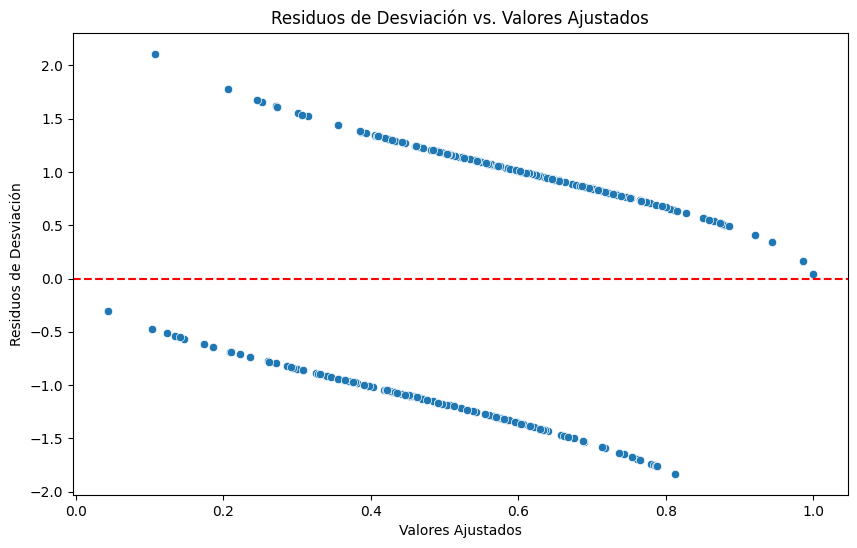

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de residuos de desviación
plt.figure(figsize=(10, 6))
sns.scatterplot(x=modelo.fittedvalues, y=residuos_desviacion)
plt.title('Residuos de Desviación vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos de Desviación')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [26]:
# Calcular la distancia de Cook
influence = modelo.get_influence()
cooks_d = influence.cooks_distance[0]

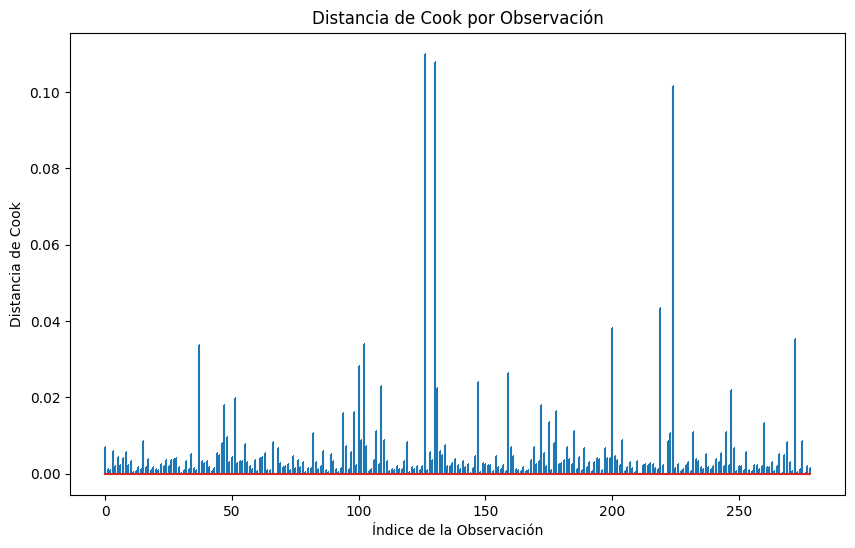

In [28]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title('Distancia de Cook por Observación')
plt.xlabel('Índice de la Observación')
plt.ylabel('Distancia de Cook')
plt.show()


In [35]:
# Verificar multicolinealidad

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X_train_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(len(X_train_final.columns))]
print(vif_data)

                    feature          VIF
0                     const     1.000000
1               mean_radius  4244.685794
2              mean_texture    12.744146
3            mean_perimeter  4358.462839
4                 mean_area   384.921731
5           mean_smoothness     8.131800
6          mean_compactness    51.860224
7            mean_concavity    79.768640
8       mean_concave_points    65.415636
9             mean_symmetry     4.158345
10   mean_fractal_dimension    17.053843
11             radius_error    80.667493
12            texture_error     5.268454
13          perimeter_error    81.788643
14               area_error    42.118761
15         smoothness_error     4.433393
16        compactness_error    15.221920
17          concavity_error    17.695010
18     concave_points_error    12.380510
19           symmetry_error     4.955979
20  fractal_dimension_error    11.503961
21             worst_radius   767.734019
22            worst_texture    21.683685
23          wors

In [32]:
# Realizar predicciones
predicciones = modelo.predict(X_test_final)


In [33]:
# Obtener intervalos de confianza
predicciones_summary_frame = modelo.get_prediction(X_test_final).summary_frame()
print(predicciones_summary_frame)


         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.484554  0.095030       0.308416       0.664615
1    0.389160  0.154298       0.151481       0.694522
2    0.576504  0.143656       0.300524       0.811790
3    0.845363  0.091516       0.580927       0.955672
4    0.547357  0.151387       0.267451       0.800207
..        ...       ...            ...            ...
166  0.664086  0.100286       0.450274       0.826736
167  0.437955  0.114211       0.238873       0.659246
168  0.458285  0.414732       0.031024       0.957180
169  0.413761  0.202628       0.120710       0.783951
170  0.565284  0.280682       0.121742       0.924233

[171 rows x 4 columns]


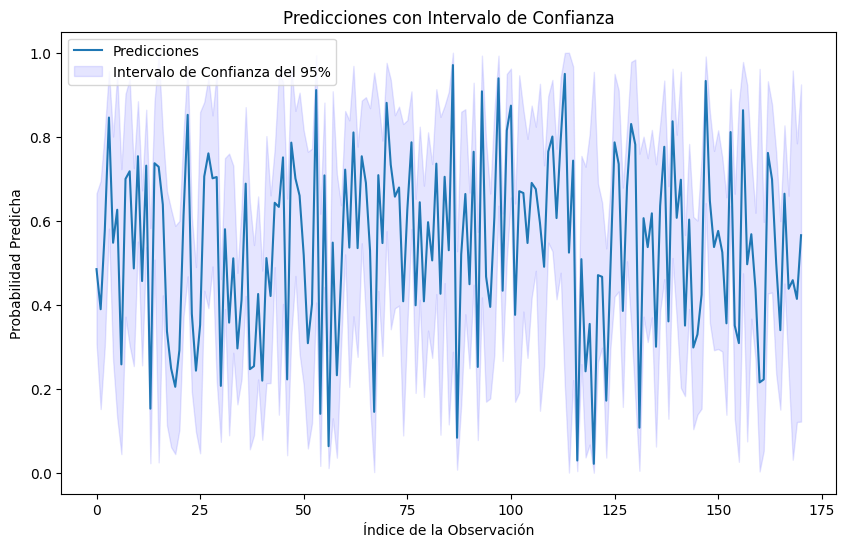

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(predicciones_summary_frame['mean'], label='Predicciones')
plt.fill_between(predicciones_summary_frame.index, predicciones_summary_frame['mean_ci_lower'], predicciones_summary_frame['mean_ci_upper'], color='b', alpha=0.1, label='Intervalo de Confianza del 95%')
plt.title('Predicciones con Intervalo de Confianza')
plt.xlabel('Índice de la Observación')
plt.ylabel('Probabilidad Predicha')
plt.legend()
plt.show()


In [37]:
predicciones = modelo.predict(X_test_final)
predicciones_clasificadas = [1 if x > 0.5 else 0 for x in predicciones]


In [38]:
print(confusion_matrix(y_test, predicciones_clasificadas))
print(classification_report(y_test, predicciones_clasificadas))


[[22 41]
 [48 60]]
              precision    recall  f1-score   support

           0       0.31      0.35      0.33        63
           1       0.59      0.56      0.57       108

    accuracy                           0.48       171
   macro avg       0.45      0.45      0.45       171
weighted avg       0.49      0.48      0.48       171



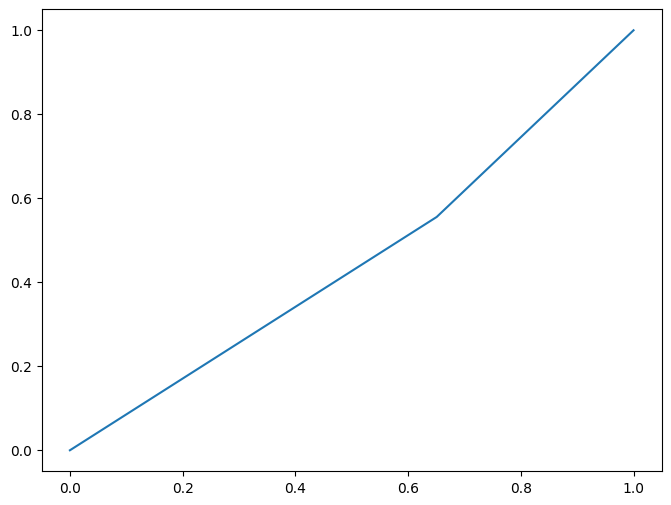

In [39]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

fpr_grande, tpr_grande, _ = roc_curve(y_test, predicciones_clasificadas)
auc_grande = auc(fpr_grande, tpr_grande)

plt.figure(figsize=(8, 6))
plt.plot(fpr_grande, tpr_grande, label=f'Modelo Grande (AUC = {auc_grande:.2f})')